In [13]:
import os
import time
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Conv1D,MaxPooling1D,GlobalAveragePooling1D
from tensorflow.keras.layers import Dropout,Flatten,RepeatVector
from tensorflow.keras.layers import Dense, Activation ,LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
# from alpha_vantage.timeseries import TimeSeries


In [53]:
def featureScaling(training_set):
  sc = MinMaxScaler(feature_range=(0,1))
  training_set_scaled = sc.fit_transform(training_set)
  return training_set_scaled,sc

def train(train_x, train_y):
    train_x, train_y = np.array(train_x), np.array(train_y)
    train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
  

    model = Sequential()
    model.add(Conv1D(32, 4, activation='relu', input_shape=(train_x.shape[1], 1),padding="same"))
    model.add(Conv1D(32, 4, activation='relu',padding="same"))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(64, 4, activation='relu',padding="same"))
    model.add(Conv1D(128, 4, activation='relu',padding="same"))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(RepeatVector(1))
    model.add(LSTM(units=100,activation='relu',return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50,activation='relu',return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=25))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
#     model.add(Dense(10, activation='relu'))
#     model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='mean_squared_error',
                  optimizer='adam')

#   model.compile(optimizer='adam',loss='mean_squared_error')

    print("......GO TO SLEEP................")
    model.fit(train_x,train_y,epochs=50,batch_size=32)
    print("......GET UP!!!!!!!!!!!!!!!")

    model.save('cnnlstm.h5')
    return model

def retrain(train_x, train_y):
  train_x, train_y = np.array(train_x), np.array(train_y)
  train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
   
  
  model = load_model('weight_file.h5')
  print("......GO TO SLEEP................")
  model.fit(train_x,train_y,epochs=30,batch_size=64)
  print("......GET UP!!!!!!!!!!!!!!!")
  model.save("new.h5")
  return model




def PlotGraph(predict_y, predicted_stock_price):
  plt.plot(predict_y, color = 'yellow', label = 'Original Stock Price')
  plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
  plt.title('APOLLOTYRE__EQ__NSE__NSE__MINUTE Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('APOLLOTYRE__EQ__NSE__NSE__MINUTE Stock Price')
  plt.legend()
  plt.show()


def predict_value(predict_x, model):
  predict_x = np.array(predict_x)
  predict_x = np.reshape(predict_x, (predict_x.shape[0], predict_x.shape[1], 1))
  predicted_y = model.predict(predict_x)
  return predicted_y

In [15]:
dataset_train = pd.read_csv("E:/Stocks Project/INFY__EQ__NSE__NSE__15__MINUTE.csv")
dataset_train.head()

,Unnamed: 0,timestamp,open
0,0,2017-01-02 09:15:00+05:30,505.73
1,1,2017-01-02 09:30:00+05:30,502.63
2,2,2017-01-02 09:45:00+05:30,502.58
3,3,2017-01-02 10:00:00+05:30,503.68
4,4,2017-01-02 10:15:00+05:30,503.50


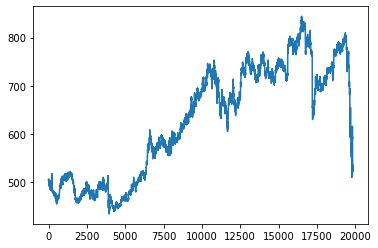

In [16]:
dataset_train["timestamp"] = pd.to_datetime(dataset_train["timestamp"])
dataset_train.dropna(axis = 0, how ='any',inplace=True)
plt.plot(dataset_train["open"])

In [17]:
training_set = dataset_train.iloc[:, 2:3].values

In [54]:
training_set_scaled,sc = featureScaling(training_set)

partition = int(len(training_set_scaled)*0.1)
start_of_test_set = len(training_set_scaled)- partition

train_x =[]
train_y =[]
for i in range(40, len(training_set_scaled)-partition):
    train_x.append(training_set_scaled[i-40:i, 0])
    train_y.append(training_set_scaled[i, 0])


predict_x =[]
predict_y =[]
for i in range(start_of_test_set, len(training_set_scaled)):
    predict_x.append(training_set_scaled[i-40:i, 0])
    predict_y.append(training_set_scaled[i, 0])


model = train(train_x, train_y)



......GO TO SLEEP................
Epoch 1/50
17817/17817 [==============================] - 27s 1ms/sample - loss: 0.0101
Epoch 2/50
17817/17817 [==============================] - 21s 1ms/sample - loss: 0.0014
Epoch 3/50
17817/17817 [==============================] - 20s 1ms/sample - loss: 0.0011
Epoch 4/50
17817/17817 [==============================] - 20s 1ms/sample - loss: 9.8962e-04
Epoch 5/50
17817/17817 [==============================] - 23s 1ms/sample - loss: 9.3655e-04
Epoch 6/50
17817/17817 [==============================] - 20s 1ms/sample - loss: 8.7108e-04
Epoch 7/50
17817/17817 [==============================] - 21s 1ms/sample - loss: 8.5477e-04
Epoch 8/50
17817/17817 [==============================] - 22s 1ms/sample - loss: 8.3326e-04
Epoch 9/50
17817/17817 [==============================] - 20s 1ms/sample - loss: 8.0335e-04
Epoch 10/50
17817/17817 [==============================] - 20s 1ms/sample - loss: 7.7688e-04
Epoch 11/50
17817/17817 [==============================] 

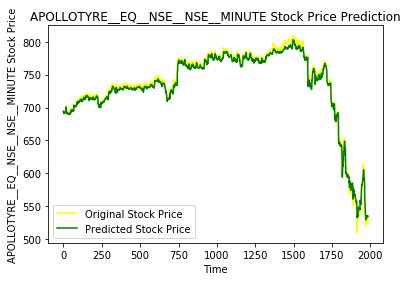

In [55]:
predict_x, predict_y = np.array(predict_x), np.array(predict_y)
predict_x = np.reshape(predict_x, (predict_x.shape[0], predict_x.shape[1], 1))

predicted_y = model.predict(predict_x)
predicted_stock_price = sc.inverse_transform(predicted_y)
predict_y=predict_y.reshape(-1,1)
predict_y = sc.inverse_transform(predict_y)

PlotGraph(predict_y, predicted_stock_price)

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(predict_y, predicted_stock_price))
print(f"RMSE is : {rmse}")

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(predict_y,predicted_stock_price)
print(f"MAE is : {mae}")

RMSE is : 5.16707887985001
MAE is : 4.080103068197926
